In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importing the built-in libraries
import seaborn as sb
import sys
import csv
maxInt = sys.maxsize
%matplotlib inline

In [395]:
while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)
df=pd.read_csv("articles1.csv",engine='python')    # Reading the dataframe
df.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON â€” Congressional Republicans ha...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, â€˜Bambiâ€™ Artist Thwarted by Rac...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,When Walt Disneyâ€™s â€œBambiâ€� opened in 194...
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isnâ€..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea â€” North Koreaâ€™s lead..."


In [396]:
#to find shape
df.shape

(50000, 10)

In [397]:
#To find duplicates
df.duplicated('id').sum()

0

In [398]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'date', 'year',
       'month', 'url', 'content'],
      dtype='object')

In [399]:
#Drop unrequired columns
df.drop(columns=['Unnamed: 0','id','year','month','url'], inplace=True,axis=1)
df.head(5)

,title,publication,author,date,content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,WASHINGTON â€” Congressional Republicans ha...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,"After the bullet shells get counted, the blood..."
2,"Tyrus Wong, â€˜Bambiâ€™ Artist Thwarted by Rac...",New York Times,Margalit Fox,2017-01-06,When Walt Disneyâ€™s â€œBambiâ€� opened in 194...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,"Death may be the great equalizer, but it isnâ€..."
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,"SEOUL, South Korea â€” North Koreaâ€™s lead..."


In [400]:
#finding null values
df.isnull().sum()

title             0
publication       0
author         6306
date              0
content           0
dtype: int64

In [401]:
#Dropping null values
df.dropna(subset=['author'],inplace=True)

In [402]:
df['publication'].value_counts()

Breitbart           23781
New York Times       7767
CNN                  7025
Business Insider     4950
Atlantic              171
Name: publication, dtype: int64

# Cleaning and lematizing the dataset

In [403]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize       # importing nltk library
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [404]:
#Finding out stopwords
stopwords=list(stopwords.words('english')) 

In [405]:
#creating lematized text
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(content):
    text1 = [lemmatizer.lemmatize(w) for w in nltk.word_tokenize(content)]
    content =" ".join(text1)
    return content

In [406]:
#cleaning of data-removing symbols,digit,underscore
def clean_data(content):
    content=re.sub("<[^>]*>"," ",content)                     
    content=re.sub("https?://[A-Za-z0-9./]+"," ",content)    
    content=re.sub("@[A-Za-z0-9_]+"," ",content)                        
    content=re.sub("#[A-Za-z0-9_]+"," ",content)               
    content=re.sub("_+"," ",content)                            
    content=re.sub("[^a-zA-z]"," ",content)                    
    content=content.lower()                                   
    word_list=word_tokenize(content)
    clean_words=[word for word in word_list if not word in stopwords]
    content=" ".join(clean_words) 
    return content

In [407]:
#lematising text data from training set
df['clean_data_content']=df['content'].apply(lambda x: clean_data(x)) 
df['clean_data_title']=df['title'].apply(lambda x: clean_data(x))

In [408]:
df['clean_data_content']=df['clean_data_content'].apply(lambda x: lemmatize_text(x)) 
df['clean_data_title']=df['clean_data_title'].apply(lambda x: lemmatize_text(x))

In [409]:
from textblob import TextBlob

In [410]:
#finding sentiment of training data
def sentiment_calc(content):
    try:
        Z=TextBlob(content).sentiment.polarity
        if(Z < 0):
            return "negative"
        if(Z > 0):
            return "positive"
        else:
            return "neutral"
    except:
        return None

df['sentiment'] = df['clean_data_title'].apply(sentiment_calc)

In [411]:
def sentiment_calc(content):
    try:
        Z=TextBlob(content).sentiment.subjectivity
        if(Z < 0):
            return "bad"
        if(Z > 0):
            return "good"
        else:
            return "normal"
    except:
        return None
df['sentiment_confidence'] = df['clean_data_title'].apply(sentiment_calc)

In [412]:
lem=WordNetLemmatizer()

In [413]:
def lemmatizing(clean_data_content):
    word_tokens=word_tokenize(clean_data_content)
    lemmatized_words=[lem.lemmatize(word) for word in word_tokens]
    clean_data_content=' '.join(lemmatized_words)
    return clean_data_content

In [414]:
df['Lemmatized_Text']=df['clean_data_content'].apply(lambda x: lemmatizing(x))

In [415]:
def lemmatizing(clean_data_title):
    word_tokens=word_tokenize(clean_data_title)
    lemmatized_words=[lem.lemmatize(word) for word in word_tokens]
    clean_data_title=' '.join(lemmatized_words)
    return clean_data_title

In [416]:
df['Lemmatized_Title']=df['clean_data_title'].apply(lambda x: lemmatizing(x))

In [417]:
df

,title,publication,author,date,content,clean_data_content,clean_data_title,sentiment,sentiment_confidence,Lemmatized_Text,Lemmatized_Title
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,WASHINGTON â€” Congressional Republicans ha...,washington congressional republican new fear c...,house republican fret winning health care suit...,positive,good,washington congressional republican new fear c...,house republican fret winning health care suit...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,"After the bullet shells get counted, the blood...",bullet shell get counted blood dry votive cand...,rift officer resident killing persist south br...,positive,good,bullet shell get counted blood dry votive cand...,rift officer resident killing persist south br...
2,"Tyrus Wong, â€˜Bambiâ€™ Artist Thwarted by Rac...",New York Times,Margalit Fox,2017-01-06,When Walt Disneyâ€™s â€œBambiâ€� opened in 194...,walt disney bambi opened critic praised spare ...,tyrus wong bambi artist thwarted racial bias d...,positive,good,walt disney bambi opened critic praised spare ...,tyrus wong bambi artist thwarted racial bias d...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,"Death may be the great equalizer, but it isnâ€...",death may great equalizer necessarily evenhand...,among death heavy toll pop music new york time,negative,good,death may great equalizer necessarily evenhand...,among death heavy toll pop music new york time
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,"SEOUL, South Korea â€” North Koreaâ€™s lead...",seoul south korea north korea leader kim said ...,kim jong un say north korea preparing test lon...,positive,good,seoul south korea north korea leader kim said ...,kim jong un say north korea preparing test lon...
...,...,...,...,...,...,...,...,...,...,...,...
49995,"Rex Tillerson Says Climate Change Is Real, but...",Atlantic,Robinson Meyer,2017-01-11,"As chairman and CEO of ExxonMobil, Rex Tillers...",chairman ceo exxonmobil rex tillerson admitted...,rex tillerson say climate change real,positive,good,chairman ceo exxonmobil rex tillerson admitted...,rex tillerson say climate change real
49996,The Biggest Intelligence Questions Raised by t...,Atlantic,AmyÂ Zegart,2017-01-11,Iâ€™ve spent nearly 20 years looking at intell...,spent nearly year looking intelligence challen...,biggest intelligence question raised trump dos...,neutral,normal,spent nearly year looking intelligence challen...,biggest intelligence question raised trump dos...
49997,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,Donald Trump will not be taking necessary st...,donald trump taking necessary step resolve con...,trump announces plan little resolve conflict i...,negative,good,donald trump taking necessary step resolve con...,trump announces plan little resolve conflict i...
49998,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,Dozens of colleges could be forced to close ...,dozen college could forced close next several ...,dozen profit college could soon close,neutral,normal,dozen college could forced close next several ...,dozen profit college could soon close


# EDA on total number of each sentiment

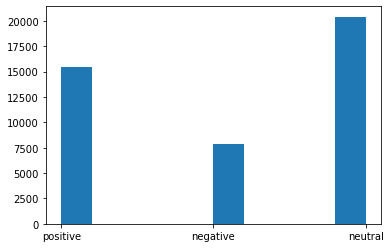

In [418]:
#ploting graph of sentiment
plt.hist(df.sentiment)
plt.show()

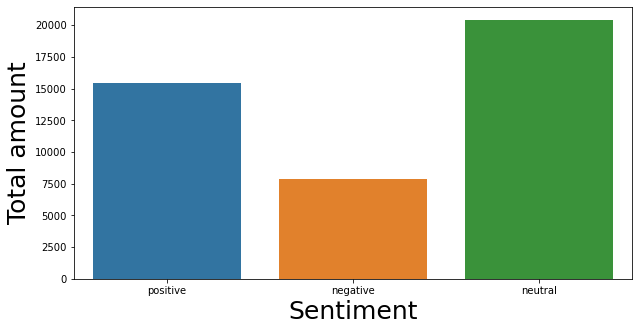

In [419]:
plt.figure(figsize=(10,5))
sb.countplot(x='sentiment',data=df)
plt.xlabel("Sentiment",fontsize=25)
plt.ylabel("Total amount",fontsize=25)
plt.show()

In [420]:
df=df[df['sentiment_confidence']=='good'] #values with sentiment confidence good
df=df[df['sentiment']!='neutral'] #dropping neutral sentiment

In [421]:
#dropping sentiment confidence
df.drop(columns=['sentiment_confidence'], inplace=True,axis=1)

In [422]:
# dataset with only positive sentiment
df_positive = df[df['sentiment']=='positive']

In [423]:
# dataset with only negative sentiment
df_negative = df[df['sentiment']=='negative']

# Number of positives and negatives by date

In [424]:
df_positive['date'].value_counts()

2016-08-22    133
2017-04-13     97
2017-04-14     90
2017-04-07     89
2017-04-12     88
             ... 
2015-07-26      1
2015-05-12      1
2015-01-09      1
2015-04-13      1
2014-12-10      1
Name: date, Length: 713, dtype: int64

In [425]:
df_negative['date'].value_counts()

2017-04-14    35
2017-03-03    33
2016-07-08    31
2016-08-22    29
2017-03-17    28
              ..
2015-05-22     1
2015-04-09     1
2015-07-01     1
2015-03-06     1
2015-03-15     1
Name: date, Length: 681, dtype: int64

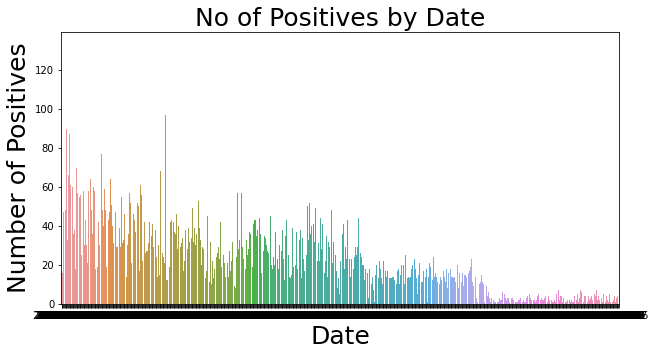

In [426]:
plt.figure(figsize=(10,5))
sb.countplot(x='date',data=df_positive)
plt.xlabel("Date",fontsize=25)
plt.ylabel("Number of Positives",fontsize=25)
plt.title("No of Positives by Date", fontsize = 25)
plt.show()

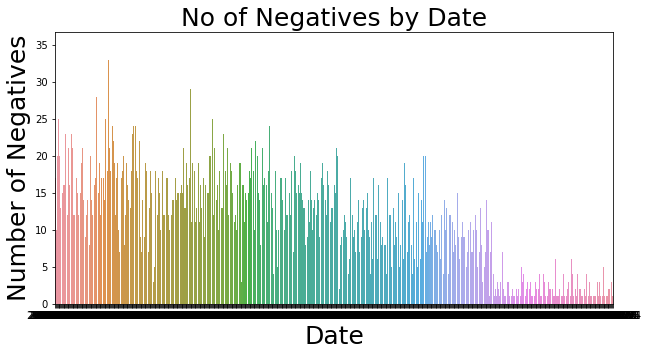

In [427]:
plt.figure(figsize=(10,5))
sb.countplot(x='date',data=df_negative)
plt.xlabel("Date",fontsize=25)
plt.ylabel("Number of Negatives",fontsize=25)
plt.title("No of Negatives by Date", fontsize = 25)
plt.show()

In [428]:
#filtering out rows to include three most frequent news stations
df1=df[df['publication']=='New York Times']
df2=df[df['publication']=='Breitbart']
df3=df[df['publication']=='CNN']

In [429]:
#creating training dataset
df_train = pd.concat([df1,df2,df3], ignore_index=True)
df_train['publication'].value_counts()

Breitbart         9932
New York Times    7767
CNN               2392
Name: publication, dtype: int64

In [430]:
no_of_rows_training = len(df_train.index)
no_of_rows_training

20091

In [431]:
#creating testing dataset
df_test = df[df['publication']=='Business Insider']

In [432]:
df_test['publication'].value_counts()

Business Insider    2786
Name: publication, dtype: int64

In [433]:
no_of_rows_testing = len(df_test.index)
no_of_rows_testing

2786

In [434]:
total_rows = no_of_rows_training + no_of_rows_testing
total_rows

22877

In [435]:
train_ratio = no_of_rows_training/total_rows
train_ratio

0.8782182978537396

In [436]:
test_ratio = no_of_rows_testing/total_rows
test_ratio

0.12178170214626044

In [437]:
df = pd.concat([df_train,df_test], ignore_index=True)

In [438]:
#concatinating all independent variables
df['exp'] = df['date'].str.cat(df['author'], sep =" ")
df['exp1'] = df['exp'].str.cat(df['publication'], sep =" ")
df['exp2'] = df['exp1'].str.cat(df['Lemmatized_Text'], sep =" ")
df['exp3'] = df['exp2'].str.cat(df['Lemmatized_Title'], sep =" ")

In [439]:
df.head()

,title,publication,author,date,content,clean_data_content,clean_data_title,sentiment,Lemmatized_Text,Lemmatized_Title,exp,exp1,exp2,exp3
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,WASHINGTON â€” Congressional Republicans ha...,washington congressional republican new fear c...,house republican fret winning health care suit...,positive,washington congressional republican new fear c...,house republican fret winning health care suit...,2016-12-31 Carl Hulse,2016-12-31 Carl Hulse New York Times,2016-12-31 Carl Hulse New York Times washingto...,2016-12-31 Carl Hulse New York Times washingto...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,"After the bullet shells get counted, the blood...",bullet shell get counted blood dry votive cand...,rift officer resident killing persist south br...,positive,bullet shell get counted blood dry votive cand...,rift officer resident killing persist south br...,2017-06-19 Benjamin Mueller and Al Baker,2017-06-19 Benjamin Mueller and Al Baker New Y...,2017-06-19 Benjamin Mueller and Al Baker New Y...,2017-06-19 Benjamin Mueller and Al Baker New Y...
2,"Tyrus Wong, â€˜Bambiâ€™ Artist Thwarted by Rac...",New York Times,Margalit Fox,2017-01-06,When Walt Disneyâ€™s â€œBambiâ€� opened in 194...,walt disney bambi opened critic praised spare ...,tyrus wong bambi artist thwarted racial bias d...,positive,walt disney bambi opened critic praised spare ...,tyrus wong bambi artist thwarted racial bias d...,2017-01-06 Margalit Fox,2017-01-06 Margalit Fox New York Times,2017-01-06 Margalit Fox New York Times walt di...,2017-01-06 Margalit Fox New York Times walt di...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,"Death may be the great equalizer, but it isnâ€...",death may great equalizer necessarily evenhand...,among death heavy toll pop music new york time,negative,death may great equalizer necessarily evenhand...,among death heavy toll pop music new york time,2017-04-10 William McDonald,2017-04-10 William McDonald New York Times,2017-04-10 William McDonald New York Times dea...,2017-04-10 William McDonald New York Times dea...
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,"SEOUL, South Korea â€” North Koreaâ€™s lead...",seoul south korea north korea leader kim said ...,kim jong un say north korea preparing test lon...,positive,seoul south korea north korea leader kim said ...,kim jong un say north korea preparing test lon...,2017-01-02 Choe Sang-Hun,2017-01-02 Choe Sang-Hun New York Times,2017-01-02 Choe Sang-Hun New York Times seoul ...,2017-01-02 Choe Sang-Hun New York Times seoul ...


# Predicting sentiment

In [440]:
#importing countvectorize
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [441]:
X = cv.fit_transform(df['exp3'].values)
Y =(df['sentiment'])

In [442]:
#Importing trainb test split
from sklearn.model_selection import train_test_split

In [443]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = test_ratio)

In [444]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((20091, 107883), (2786, 107883), (20091,), (2786,))

In [445]:
from sklearn.naive_bayes import MultinomialNB
nv = MultinomialNB()
from sklearn.ensemble import RandomForestClassifier

In [446]:
from sklearn.metrics import accuracy_score

# Random Forest

In [447]:
rfc = RandomForestClassifier()

In [448]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [449]:
y_pred_rfc = rfc.predict(X_test)

In [450]:
rfc_score=accuracy_score(y_pred_rfc, Y_test)
print(rfc_score)

0.702440775305097


# Naves Bayes

In [451]:
nv.fit(X_train,Y_train)

MultinomialNB()

In [452]:
y_pred_niv = nv.predict(X_test)

In [453]:
niv_score=accuracy_score(y_pred_niv, Y_test)
print(niv_score)

0.6651112706389088


# SVM

In [454]:
from sklearn.svm import SVC

In [455]:
svc = SVC()

In [456]:
svc.fit(X_train,Y_train)

SVC()

In [457]:
y_pred_svc = svc.predict(X_test)

In [458]:
svc_score=accuracy_score(y_pred_svc, Y_test)
print(svc_score)

0.7315147164393395


In [459]:
score=max(rfc_score,svc_score,niv_score)
if(score==rfc_score):
    print("the best algorithm is RANDOM FOREST :%f" %score)
if(score==svc_score):
    print("the best algorithm is SVC :%f" %score)
if(score==niv_score):
    print("the best algorithm is NAIVE BAYES :%f" %score)

the best algorithm is SVC :0.731515
